<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Simple Linear Regression with Sacramento Real Estate Data

---

In this lab, you will hone your exploratory data analysis (EDA) skills and practice constructing linear regressions on a data set of Sacramento real estate sales.  The data set contains information on qualities of the property, location of the property, and time of sale.

### 1. Read in the Sacramento housing data set.

The file is stored in the `datasets` subfolder.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
sacramento = pd.read_csv('datasets/sacramento_real_estate_transactions.csv')

In [6]:
sacramento.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [7]:
sacramento.shape

(985, 12)

In [5]:
sacramento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     985 non-null    object 
 1   city       985 non-null    object 
 2   zip        985 non-null    int64  
 3   state      985 non-null    object 
 4   beds       985 non-null    int64  
 5   baths      985 non-null    int64  
 6   sq__ft     985 non-null    int64  
 7   type       985 non-null    object 
 8   sale_date  985 non-null    object 
 9   price      985 non-null    int64  
 10  latitude   985 non-null    float64
 11  longitude  985 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.5+ KB


In [8]:
sacramento.describe()

,zip,beds,baths,sq__ft,price,latitude,longitude
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,95750.697462,2.911675,1.776650,1312.918782,233715.951269,38.445121,-121.193371
std,85.176072,1.307932,0.895371,856.123224,139088.818896,5.103637,5.100670
min,95603.000000,0.000000,0.000000,-984.000000,-210944.000000,-121.503471,-121.551704
25%,95660.000000,2.000000,1.000000,950.000000,145000.000000,38.482704,-121.446119
50%,95762.000000,3.000000,2.000000,1304.000000,213750.000000,38.625932,-121.375799
75%,95828.000000,4.000000,2.000000,1718.000000,300000.000000,38.695589,-121.294893
max,95864.000000,8.000000,5.000000,5822.000000,884790.000000,39.020808,38.668433


In [9]:
sacramento.isnull().sum()

street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

In [10]:
sacramento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     985 non-null    object 
 1   city       985 non-null    object 
 2   zip        985 non-null    int64  
 3   state      985 non-null    object 
 4   beds       985 non-null    int64  
 5   baths      985 non-null    int64  
 6   sq__ft     985 non-null    int64  
 7   type       985 non-null    object 
 8   sale_date  985 non-null    object 
 9   price      985 non-null    int64  
 10  latitude   985 non-null    float64
 11  longitude  985 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.5+ KB


### 2. Conduct exploratory data analysis on this data set. 

If you discover any issues with the data, fix them to the best of your ability. **Report any notable findings.**

_**Note:** Zip codes often have leading zeros — e.g., 02215 = Boston, MA — which will often get knocked off automatically by many software programs like Python or Excel._

In [11]:
sacramento.columns

Index(['street', 'city', 'zip', 'state', 'beds', 'baths', 'sq__ft', 'type',
       'sale_date', 'price', 'latitude', 'longitude'],
      dtype='object')

In [12]:
sacramento[sacramento['price'] < 0]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
703,1900 DANBROOK DR,SACRAMENTO,95835,AC,1,1,-984,Condo,Fri May 16 00:00:00 EDT 2008,-210944,-121.503471,38.668433


In [13]:
# Drop 117
# # Alternative way to drop (uncomment to run)
# ads.drop("Unnamed: 0", axis=1, inplace=True)
sacramento_backup = sacramento
df = sacramento[sacramento['price'] > 0]
sacramento = df

In [14]:
df2 = df[df['sq__ft'] > 0]

In [15]:
sacramento = df2

In [16]:
sacramento[sacramento['price'] < 0]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude


In [17]:
sacramento.describe()

,zip,beds,baths,sq__ft,price,latitude,longitude
count,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000
mean,95761.400984,3.247232,1.961870,1591.892989,229471.130381,38.576931,-121.378533
std,85.357516,0.849012,0.669367,663.908347,119897.576889,0.126352,0.119730
min,95603.000000,1.000000,1.000000,484.000000,2000.000000,38.241514,-121.550527
25%,95670.000000,3.000000,2.000000,1144.000000,148750.000000,38.473814,-121.451444
50%,95820.000000,3.000000,2.000000,1419.000000,207973.000000,38.591618,-121.404999
75%,95828.000000,4.000000,2.000000,1851.000000,285000.000000,38.674864,-121.325730
max,95864.000000,8.000000,5.000000,5822.000000,884790.000000,39.008159,-120.597599


In [18]:
# screen and justify , we are not correct
sacramento['sale_date'].unique()

array(['Wed May 21 00:00:00 EDT 2008', 'Tue May 20 00:00:00 EDT 2008',
       'Mon May 19 00:00:00 EDT 2008', 'Fri May 16 00:00:00 EDT 2008',
       'Thu May 15 00:00:00 EDT 2008'], dtype=object)

In [19]:
sacramento.dtypes

street        object
city          object
zip            int64
state         object
beds           int64
baths          int64
sq__ft         int64
type          object
sale_date     object
price          int64
latitude     float64
longitude    float64
dtype: object

When you've finished cleaning or have made a good deal of progress cleaning, it's always a good idea to save your work. Use the pandas `to_csv` method to export your cleaned dataset.

```python
# example -- your dataframe name may be different
dataframe.to_csv('./datasets/sacramento_cleaned_dataframe.csv', index=False)

```

In [22]:
sacramento.to_csv('./datasets/sacramento_cleaned_dataframe.csv', index=False)

### 3. Our goal will be to predict price. List variables that you think qualify as predictors of price in an SLR (Simple Linear Regression) model.

For each of the variables you believe should be considered, generate a plot showing the relationship between the independent and dependent variables.

In [23]:
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 14
sns.set_style("whitegrid")

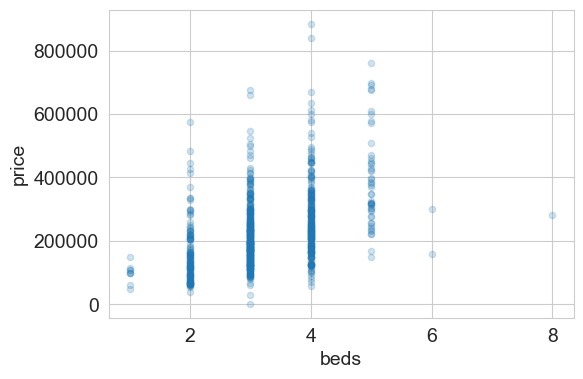

In [24]:
# Pandas scatterplot
sacramento.plot(kind='scatter', x='beds', y='price', alpha=0.2)
plt.show()

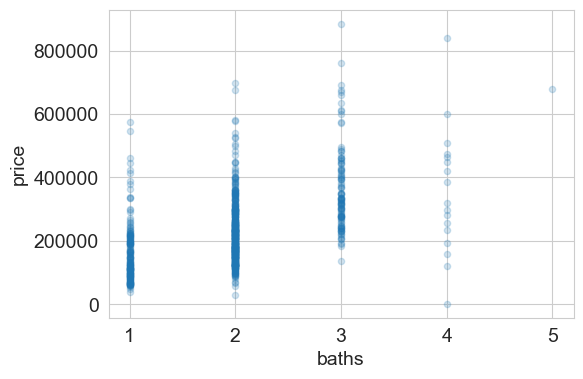

In [25]:
# Pandas scatterplot
sacramento.plot(kind='scatter', x='baths', y='price', alpha=0.2)
plt.show()

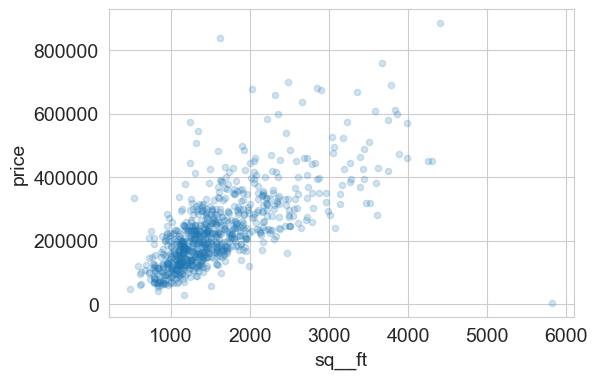

In [26]:
# Pandas scatterplot  focus x on sq_ft
sacramento.plot(kind='scatter', x='sq__ft', y='price', alpha=0.2)
plt.show()

In [27]:
sacramento.columns

Index(['street', 'city', 'zip', 'state', 'beds', 'baths', 'sq__ft', 'type',
       'sale_date', 'price', 'latitude', 'longitude'],
      dtype='object')

In [28]:
# 1.
feature_cols = ['sq__ft']
#X[feature_cols] 

In [29]:
X = sacramento[feature_cols]  # DataFrame
y = sacramento['price'] # Vector  change to price  beds

In [30]:
print(X.shape)
print(y.shape)

(813, 1)
(813,)


In [31]:
assert X.shape[0] == y.shape[0]

In [32]:
# Instantiate
lr = LinearRegression() # Copy of the Linear regression Class

In [33]:
# Confirm
type(lr)

sklearn.linear_model._base.LinearRegression

In [34]:
lr.fit(X, y)

LinearRegression()

In [35]:
# coefficients
lr.coef_

array([125.31418258])

In [36]:
# y intercept
lr.intercept_

29984.361726519768

In [37]:
# Zip coef_ with the features list
list(zip(X.columns, lr.coef_))

[('sq__ft', 125.31418257510141)]

In [38]:
# Turn it into a data series
pd.Series(lr.coef_, index=X.columns)

sq__ft    125.314183
dtype: float64

In [39]:
# Turn it into a data frame
pd.DataFrame(lr.coef_, index=X.columns, columns=['Coefficient'])

,Coefficient
sq__ft,125.314183


In [40]:
sacramento.head(2)

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028


In [41]:
# get predictions from our X data
y_preds = lr.predict(X)

In [42]:
# first row in data 
y_preds[0]

134747.01835930455

In [43]:
type(y_preds)

numpy.ndarray

In [44]:
# This is what our model predicts for 1st row in data
X.head(1)

,sq__ft
0,836


In [45]:
lr.coef_

array([125.31418258])

In [46]:
# Calculate a prediction by hand
lr.intercept_ + (lr.coef_[0] * 836)

134747.01835930455

In [47]:
# calculate residuals
residuals = y - y_preds
residuals[0:1]

0   -75525.018359
Name: price, dtype: float64

In [48]:
# mean of residuals
residuals.mean()

# It has as mean of zero.
# Residual's mean approximately 0

4.582152888637041e-12

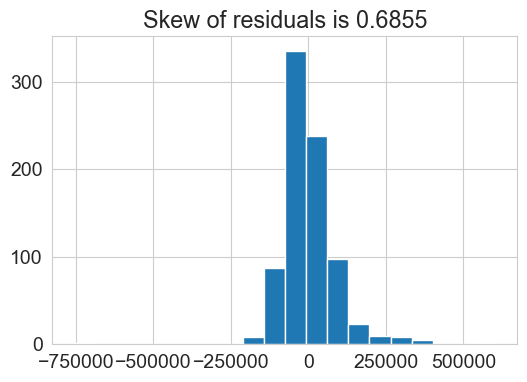

In [49]:
# Normality assumption 
plt.hist(residuals, bins=20)
plt.title(f"Skew of residuals is {pd.Series(residuals).skew():.4f}")
plt.show()

In [50]:
sacramento['price'].describe()

count       813.000000
mean     229471.130381
std      119897.576889
min        2000.000000
25%      148750.000000
50%      207973.000000
75%      285000.000000
max      884790.000000
Name: price, dtype: float64

In [51]:
sacramento['price'].sort_values(ascending=False)

864    884790
334    839000
553    760000
333    699000
552    691659
        ...  
605     55422
336     48000
335     40000
603     30000
866      2000
Name: price, Length: 813, dtype: int64

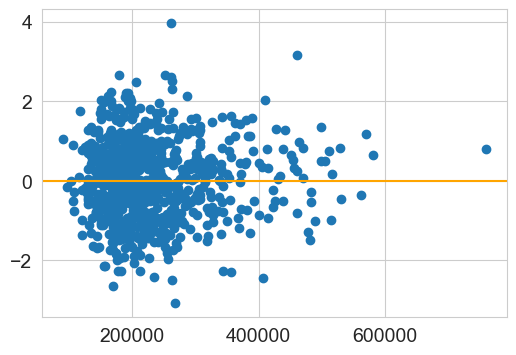

In [52]:
# Use np.random.randn to show what we expect in a residual plot
# create fake residuals


# Create fake errors/residuals to visually output how we would prefer our
# real residuals to look like when plotted
errors_fake = np.random.randn(sacramento.shape[0])
plt.scatter(y_preds, errors_fake)
plt.axhline(0, color='orange')
plt.show()

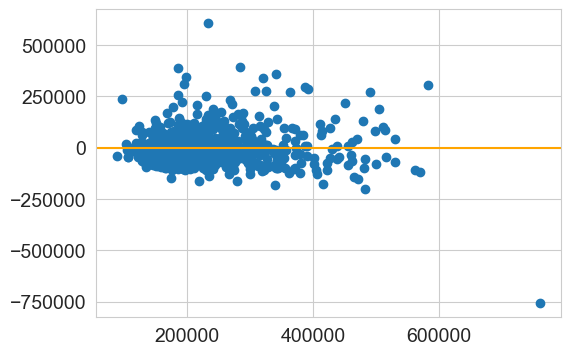

In [53]:
# Let's plot our residuals - check the L and E assumptions

plt.scatter(y_preds, residuals)
plt.axhline(0, color='orange')
plt.show()

### 4. Which variable would be the best predictor of `y` in an SLR (Simple Linear Regression) model? Why?

In [54]:
sacramento.columns

Index(['street', 'city', 'zip', 'state', 'beds', 'baths', 'sq__ft', 'type',
       'sale_date', 'price', 'latitude', 'longitude'],
      dtype='object')

In [55]:
feature_cols = ['sq__ft']

In [56]:
# 2. Three different way to create X:
X = sacramento[feature_cols]  # DataFrame
y = sacramento['price'] # Vector

In [57]:
# 3.
# Recommanded approch when working with high dimensional datasets.
# In other words, 'wide' datasets

X = sacramento.drop(columns=['price'])

In [58]:
# Create y vector
y = sacramento['price']

In [59]:
print(X.shape)
print(y.shape)

(813, 11)
(813,)


In [60]:
assert X.shape[0] == y.shape[0]

### 5. Write a function that will take in two lists, `x` and `y`, and returns the intercept and slope coefficients that minimize SSE (Sum of Squared Errors). 

`y` is the target variable, and `x` is the predictor variable.

**Don't use scikit-learn for this**. Instead, use numpy and scipy.

The slope and intercept of simple linear regression can be calculated by using certain summary statistics. In particular, we'll need to know:

- $\bar{x}$, the mean of `x`
- $\bar{y}$, the mean of `y`
- $s_{x}$, the standard deviation of `x`
- $s_{y}$, the standard deviation of `y`
- $r_{xy}$, the correlation of `x` and `y`

Given these summary statistics, the **coefficient on `X`** (or the slope) can be given by $\beta_{1} = r_{xy} * \frac{s_{y}}{s_{x}}$. The **intercept of the model** can be given by $\beta_{0} = \bar{y} - \beta_{1}\bar{x}$.

Your function should take in `x` and `y`, then use the above summary statistics to calculate the slope and intercept.

- **Test your function on price and the variable you determined was the best predictor in Question #4.**
- **Report the slope and intercept.**

In [61]:
import scipy

def lin_reg(X, y):
    beta1 = (scipy.stats.pearsonr(X,y)[0]*np.std(y)/np.std(X))
    beta0 = np.mean(y) - (beta1*np.mean(X))
    return beta0, beta1

In [62]:
sacramento.columns

Index(['street', 'city', 'zip', 'state', 'beds', 'baths', 'sq__ft', 'type',
       'sale_date', 'price', 'latitude', 'longitude'],
      dtype='object')

In [63]:
var_ = lin_reg(sacramento['sq__ft'], sacramento['price'])
var_

(29984.361726519885, 125.31418257510134)

In [64]:
sacramento['sq__ft'][10]

909

In [65]:
(sacramento['sq__ft'][10] * 125.31418257510134) + var_[0]

143894.953687287

In [66]:
print(sacramento['price'][10])

100309


### 6. Now interpret the intercept and the slope.

Intercept (often denoted as "$b₀$"):

This is the value of the dependent variable (y) when the independent variable (x) is 0.
It represents the point where the regression line crosses the y-axis.
Interpretation: It shows the expected value of the outcome (y) when no predictor (x) is present.
Example: In a model predicting salary based on years of experience, the intercept would represent the estimated salary of someone with 0 years of experience.

Slope (often denoted as "$b₁$"):

This indicates the rate of change of the dependent variable (y) for each unit change in the independent variable (x).
It represents the steepness or incline of the regression line.
Interpretation: It tells how much y is expected to increase (or decrease) with a one-unit increase in x.
Example: If the slope is 2, it means that for every additional year of experience, the salary is expected to increase by 2 units.
In short, the intercept tells us where the line starts (at x=0), and the slope tells us how steep the line is (how much y changes for each unit change in x).

### 7. Give an example of how this model could be used for prediction and how it could be used for inference. 

**Be sure to make it clear which example is associated with prediction and which is associated with inference.**

Example use predic  
 - You input features of a new house (e.g., 3 bedrooms, 2 bathrooms, 1500 square feet).
 - The model then predicts the likely price of the house, say $350,000.

### 8: Using the model you came up with in Question #5, calculate and plot the residuals.

In [67]:
beta0 = 29984.361726519885   #B0
beta1 = 125.31418257510134       #B1

<Axes: xlabel='price', ylabel='Count'>

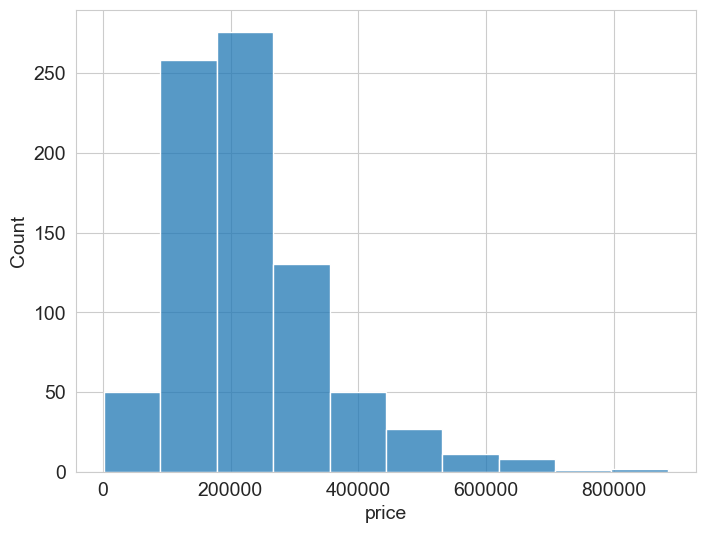

In [68]:
plt.figure(figsize=(8,6))
sns.histplot(sacramento['price'], bins=10)

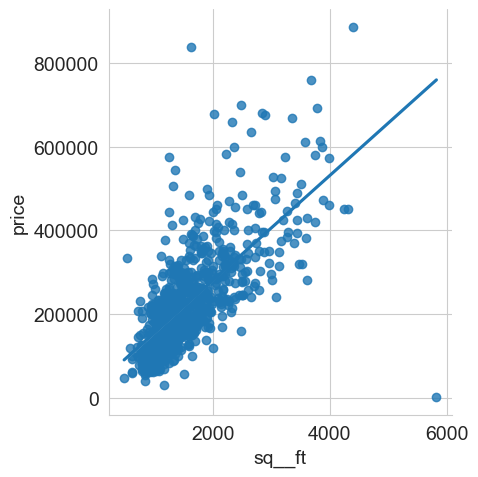

In [69]:
import warnings
warnings.simplefilter('ignore')

sns.lmplot(x='sq__ft', y='price', data=sacramento, ci=False, fit_reg=True)
plt.show()

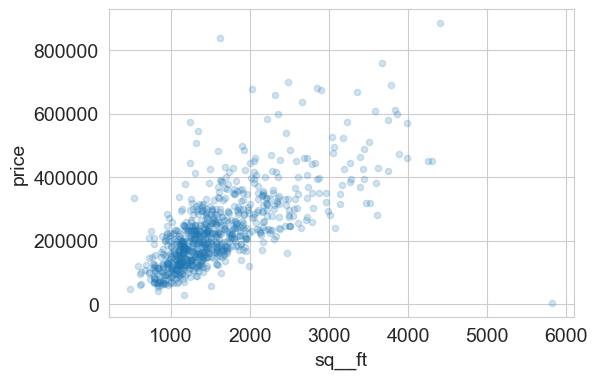

In [70]:
# Pandas scatterplot  focus x on sq_ft
sacramento.plot(kind='scatter', x='sq__ft', y='price', alpha=0.2, )

plt.show()

In [71]:
# Question #8
x = sacramento['sq__ft'].values  # .values changes the output from the X DataFrame to a np.ndarray

# Now perform the regression calculation
y_preds = beta0 + beta1 * x

# Now assign your predictions back to your original DataFrame
sacramento['predictions'] = y_preds

# Now calculate your residuals
sacramento['residuals'] = sacramento['price'] - sacramento['predictions']

# Now plot your residuals in a variety of ways (including using Seaborn's lmplot

In [72]:
sacramento.columns

Index(['street', 'city', 'zip', 'state', 'beds', 'baths', 'sq__ft', 'type',
       'sale_date', 'price', 'latitude', 'longitude', 'predictions',
       'residuals'],
      dtype='object')

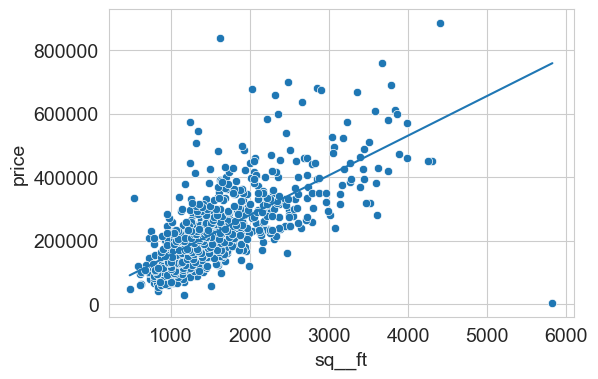

In [83]:
sns.scatterplot(x='sq__ft', y='price', data=sacramento)
sns.lineplot(data=sacramento,x='sq__ft', y='predictions')
plt.show()

In [82]:
# calculate residuals
x = X.values
type(x)
type(y_preds)
#df['Residual'] = df['Observed'] - df['Predicted']

numpy.ndarray

In [75]:
# calculate residuals
#x = sacramento['sq_ft'][10]
#y_preds = b0_intercept + b1_slope * x

#residuals = y - y_preds
#residuals[0:3]

In [76]:
# mean of residuals
#residuals.mean()

# It has as mean of zero.
# Residual's mean approximately 0

In [77]:
# Normality assumption 
#plt.hist(residuals, bins=20)
#plt.title(f"Skew of residuals is {pd.Series(residuals).skew():.4f}")
#plt.show()

In [85]:
sacramento['price'].describe()

count       813.000000
mean     229471.130381
std      119897.576889
min        2000.000000
25%      148750.000000
50%      207973.000000
75%      285000.000000
max      884790.000000
Name: price, dtype: float64

In [86]:
sacramento['price'].sort_values(ascending=False)

864    884790
334    839000
553    760000
333    699000
552    691659
        ...  
605     55422
336     48000
335     40000
603     30000
866      2000
Name: price, Length: 813, dtype: int64

---

## Dummy Variables

It is important to be cautious with categorical variables, which represent distinct groups or categories, when building a regression. If put in a regression "as-is," categorical variables represented as integers will be treated like *continuous* variables.

That is to say, instead of group "3" having a different effect on the estimation than group "1" it will estimate literally 3 times more than group 1. 

For example, if occupation category "1" represents "analyst" and occupation category "3" represents "barista", and our target variable is salary, if we leave this as a column of integers then barista will always have `beta*3` the effect of analyst.

This will almost certainly force the beta coefficient to be something strange and incorrect. Instead, we can re-represent the categories as multiple "dummy coded" columns.



#### A Word of Caution When Creating Dummies

Let's touch on precautions we should take when dummy coding.

**If you convert a qualitative variable to dummy variables, you want to turn a variable with N categories into N-1 variables.**

> **Scenario 1:** Suppose we're working with the variable "sex" or "gender" with values "M" and "F". 

You should include in your model only one variable for "sex = F" which takes on 1 if sex is female and 0 if sex is not female! Rather than saying "a one unit change in X," the coefficient associated with "sex = F" is interpreted as the average change in Y when sex = F relative to when sex = M.

| Female | Male | 
|-------|------|
| 0 | 1 | 
| 1 | 0 |
| 0 | 1 |
| 1 | 0 |
| 1 | 0 |
_As we can see a 1 in the female column indicates a 0 in the male column. And so, we have two columns stating the same information in different ways._

> Scenario 2: Suppose we're modeling revenue at a bar for each of the days of the week. We have a column with strings identifying which day of the week this observation occurred in.

We might include six of the days as their own variables: "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday". **But not all 7 days.**  

|Monday | Tuesday | Wednesday | Thursday | Friday | Saturday | 
|-------|---------|-----------|----------|--------|----------|
| 1     | 0       |0          |      0   |0       | 0        | 
| 0     | 1       |0          |      0   |0       | 0        | 
| 0     | 0       |1          |      0   |0       | 0        | 
| 0     | 0       |0          |      1   |0       | 0        | 
| 0     | 0       |0          |      0   |1       | 0        | 
| 0     | 0       |0          |      0   |0       | 1        | 
| 0     | 0       |0          |      0   |0       | 0        | 

_As humans we can infer from the last row that if its is not Monday, Tuesday, Wednesday, Thursday, Friday or Saturday, it must be Sunday. Models work the same way._

The coefficient for Monday is then interpreted as the average change in revenue when "day = Monday" relative to "day = Sunday." The coefficient for Tuesday is interpreted as the average change in revenue when "day = Tuesday" relative to "day = Sunday" and so on.

The category you leave out, which the other columns are *relative to*, is often referred to as the **reference category**.

### 9. Use the `pd.get_dummies` function to convert the `type` column into dummy-coded variables.

In [87]:
# Example data set
data = {
    'sex': ['F', 'M', 'F', 'M', 'F'],
    'age': [23, 45, 31, 50, 22],
    'salary': [50000, 55000, 52000, 58000, 48000]
}

# Convert to DataFrame
df = pd.DataFrame(data)
# Create dummy variable for 'sex' where F = 1, M = 0
#df['Female'] = df['sex'].apply(lambda x: 1 if x == 'F' else 0)
#df

df_with_dummies = pd.get_dummies(df, columns=['sex'])
df['sex_F'] = df['sex'].apply(lambda x: 1 if x == 'True' else 0)
df['sex_M'] = df['sex'].apply(lambda x: 1 if x == 'True' else 0)
df_with_dummies

,age,salary,sex_F,sex_M
0,23,50000,True,False
1,45,55000,False,True
2,31,52000,True,False
3,50,58000,False,True
4,22,48000,True,False


### 10. Check the dummy columns you've created. Do they all make sense?

Use `.head()` on the new dataframe you've created. Depending on how you cleaned the data earlier in this notebook, there may be a dummy column that needs to be removed. Check that all the columns you've created make sense, and if any of the columns seem to be errors, drop them. If there don't appear to be any errors, then move on to the next step!

In [88]:
df_with_dummies.head()

,age,salary,sex_F,sex_M
0,23,50000,True,False
1,45,55000,False,True
2,31,52000,True,False
3,50,58000,False,True
4,22,48000,True,False


### 11. Build what you think may be the best MLR (Multiple Linear Regression) model predicting `price`. 

Choose at least three variables, and build a model that uses them to predict price. At least one of the variables you choose should be a dummy-coded variable. (This can be one we created before or a new one.) 

You may need to load in the scikit-learn API:

```python
from sklearn.linear_model import LinearRegression

model = LinearRegression()
```

In [ ]:
# The general form of the MLR model is:
# Price = B0 + B1(Sq_ft) + B2(Beds) + B3(Age) + e

In [97]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
df2 = pd.DataFrame(sacramento)

In [98]:
# Define X
X = df2[['sq__ft', 'beds', 'zip']]
# Define y
y = df2['price']

In [99]:
# Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [100]:
model = LinearRegression()

In [101]:
model.fit(X_train, y_train)

LinearRegression()

In [103]:
y_pred = model.predict(X_test)

In [105]:
# beta values
print("Coefficients: \n", model.coef_)

Coefficients: 
 [   132.47267726 -10921.7136041    -205.85342199]


In [106]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [108]:
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 7244073276.835896
R-squared (R2): 0.4298097778605783


### 12. Plot the true price vs the predicted price to evaluate your MLR (Multiple Linear Regression) visually.

You can use matplotlib or seaborn.

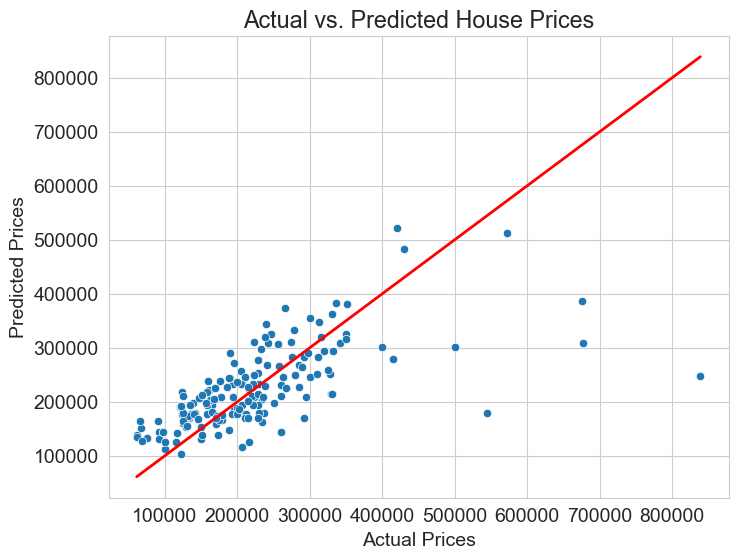

In [111]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
# Add labels and title
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted House Prices')

# Show the plot
plt.show()

### 13. List the five assumptions for an MLR (Multiple Linear Regression) model. 

Indicate which ones are the same as the assumptions for an SLR model. 

In [89]:
#The assumptions necessary to conduct a proper linear regression are easily remembered by the "LINE" acronym:
#
#    L - Linearity
#    I - Independence (of observations) -> True by assumption
#    N - Normality (of residuals)
#    E - Equal variances (of residuals - AKA Homoscedasticity)

# Linearity - This assumption states that there should be a linear relationship between the independent variables (X) 
# and the dependent variable (y). In other words, the change in the dependent variable should be proportional to the
# change in the independent variable. This can all be checked with scatterplots or partial regression plots.

# Independence (of observations) - This assumes each data point is independent of the others. There should be NO 
# relationship between the residuals of any two observations. This is often true by the very nature of data collection,
# but can be violated in time series or clustered data. Violations can lead to autocorrelation.

# Normality (of residuals) - The residuals (differences between the observed and the predicted values) should be
# normally distributed. THIS DOES NOT MEAN THE RAW DATA NEEDS TO BE NORMAL, JUST THE RESIDUALS. This can be checked
# using Q-Q plots or statistical tests like the Shapiro-Wilk test. Mild violations of normality are generally not
# severe for large sample sizes.

# Equal variances of residuals (Homoscedasticity) - The assumption that the variance of residuals should be constant
# across all levels of the independent variables. In other words, the spread of residuals should be roughly the same
# throughout the data. We check by plotting residuals against our predicted values. Violations lead to heteroscedasticity,
# which can then impact or affect the standard errors of the coefficients.


### 14. Pick at least two assumptions and explain whether or not you believe them to be met for your model, and explain why.

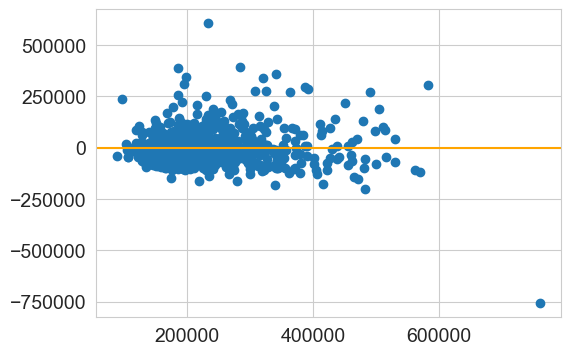

In [90]:
# Let's plot our residuals - check the L and E assumptions

plt.scatter(y_preds, residuals)
plt.axhline(0, color='orange')
plt.show()

### 15. [Bonus] Generate a table showing the point estimates, standard errors, t-scores, p-values, and 95% confidence intervals for the model you built. 

**Write a few sentences interpreting some of the output.**

> **Hint:** scikit-learn does not have this functionality built in, but statsmodels does in the `summary` method.  To fit the statsmodels model use something like the following.  There is one big caveat here, however!  `statsmodels.OLS` does _not_ add an intercept to your model, so you will need to do this explicitly by adding a column filled with the number 1 to your X matrix

```python
import statsmodels.api as sm

# The Default here is Linear Regression (ordinary least squares regression OLS)
model = sm.OLS(y,X).fit()
```

In [127]:
import statsmodels.api as sm

# Define X
#X = df2[['sq__ft', 'beds', 'zip']]
# Define y
#y = df2['price']

X = sm.add_constant([[1, 2], [2, 3], [3, 4], [4, 5], [5, 6], [6, 7]])  # Example independent variables with constant (intercept)
y = [1, 2, 3, 4, 5, 6]  # Example dependent variable

In [128]:
# Fit the model
model = sm.OLS(y, X)
results = model.fit()

In [129]:
params = results.params  # Point estimates
std_errors = results.bse  # Standard errors
t_scores = results.tvalues  # t-scores
p_values = results.pvalues  # p-values
conf_intervals = results.conf_int()  # Confidence intervals

In [132]:
# Create Summary Table
table = pd.DataFrame({
    'Point Estimate (β)': params,
    'Standard Error': std_errors,
    't-Score': t_scores,
    'p-Value': p_values,
    '95% CI Lower': conf_intervals[:, 0],
    '95% CI Upper': conf_intervals[:, 1]
})

# Display the table
print(table)

   Point Estimate (β)  Standard Error       t-Score       p-Value  \
0           -0.333333    5.758591e-16 -5.788453e+14  5.344429e-59   
1            0.666667    3.812544e-16  1.748614e+15  6.417647e-61   
2            0.333333    2.004332e-16  1.663064e+15  7.843592e-61   

   95% CI Lower  95% CI Upper  
0     -0.333333     -0.333333  
1      0.666667      0.666667  
2      0.333333      0.333333  


### 16. Regression Metrics

Implement a function called `r2_adj()` that will calculate $R^2_{adj}$ for a model. 

In [ ]:
## As a function and if splitting data...
def r2_adj(y, y_pred, p):
    n = len(y)
    y_mean = np.mean(y)
    numerator = np.sum(np.square(y - y_pred)) / (n - p - 1)
    denominator = np.sum(np.square(y - y_mean)) / (n - 1)
    return 1 - numerator / denominator

### 17. Metrics, metrics, everywhere...

Calculate and interpret at least three regression metrics. How well does your model perform?

In [ ]:
# Mean Absolute Error (MAE)  Measures the average magnitude of errors in predictions, without considering their direction
# if MAE = 5, it means on average, the model's predictions are off by 5 units.

In [ ]:
# Mean Squared Error (MSE): Measures the average of the squares of the errors, which penalizes larger errors more significantly
# If MSE = 25, it implies the average squared deviation from the true value is 25 units.

In [ ]:
# R-squared (R2) Represents the proportion of the variance in the dependent variable that is predictable from the independent variables
# if 𝑅2=0.8%
 =0.8, 80% of the variance is explained by the model, while 20% is unexplained.

### 18. Model Iteration

Adjust your model by adding or removing a variable. Then calculate the same regression metrics as you used in question 17. Has your model performance increased or decreased?

1. The original model
2. The dataset
3. The metrics you calculated
4. The new variable

### 19. Bias vs. Variance

_(To be completed after the bias-variance tradeoff lecture.)_ At this point, do you think your model is high bias, high variance or in the sweet spot?

There is still some error because the training that is suitable for the data that happened in the past may be too good to apply 
to the data that will happen in the future. Therefore, it must be adjusted to be suitable all the time.